Let's do the same thing but in Resnet101.

In [1]:
from fastai.vision import *
from fastai.utils.ipython import * 

In [2]:
from fastai.callbacks.tracker import *

In [3]:
import pickle
with open('labels.pkl','rb') as f:
    labels = pickle.load(f)

In [4]:
path = Path('./')

In [5]:
src = (ImageList
       .from_folder(path,include='cars_train',extensions='.jpg')
       .split_by_rand_pct(0.1, seed=42)
       .label_from_func(lambda x: labels[x.name])
      )

In [16]:
data = (src
        .transform(get_transforms(),size=(224,224))
        .databunch()
        .normalize(imagenet_stats)
       )

In [17]:
data.batch_size = 50

Once again, we use mixup for better performance.

In [18]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-02
Min loss divided by 10: 4.79E-03


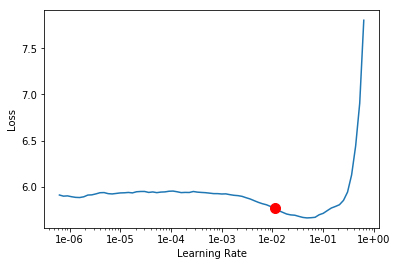

In [10]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [19]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.618480,3.878811,0.153563,01:15
1,3.987652,2.991249,0.261671,01:15
2,3.356151,2.158165,0.458231,01:15
3,2.791075,1.384874,0.632678,01:16
4,2.414920,1.243546,0.671990,01:15


In [20]:
learn.save('1_freeze_224_resnet50')

In [21]:
learn.load('1_freeze_224_resnet50');

In [22]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-5,1e-3)),

epoch,train_loss,valid_loss,accuracy,time
0,2.397275,1.255363,0.676904,01:38
1,2.381799,1.183658,0.670762,01:37
2,2.203111,0.993337,0.732187,01:37
3,1.973875,0.784346,0.799754,01:37
4,1.909655,0.752699,0.793612,01:37


(None,)

In [23]:
learn.save('2_freeze_224_resnet50')

In [24]:
learn.load('2_freeze_224_resnet50');

In [25]:
learn.unfreeze()
learn.fit_one_cycle(7, slice(1e-5,1e-3)),

epoch,train_loss,valid_loss,accuracy,time
0,1.875613,0.770133,0.788698,01:37
1,1.987629,0.933654,0.734644,01:37
2,2.008406,0.865947,0.766585,01:37
3,1.886546,0.727257,0.796069,01:37
4,1.748500,0.620339,0.836609,01:37
5,1.671613,0.588293,0.847666,01:37
6,1.636252,0.569941,0.857494,01:38


(None,)

In [27]:
learn.save('3_freeze_224_resnet50');

## Increasing Image Size

In [8]:
data = (src
        .transform(get_transforms(),size=(299,299))
        .databunch(bs=30)
        .normalize(imagenet_stats)
       )

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy).mixup()

In [10]:
learn.load('3_freeze_224_resnet50');

In [11]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-6,1e-4)),

epoch,train_loss,valid_loss,accuracy,time
0,1.724528,0.533797,0.857494,03:07
1,1.672262,0.509639,0.872236,02:59
2,1.609742,0.496125,0.875921,02:59
3,1.636020,0.483967,0.874693,03:00
4,1.561777,0.483696,0.872236,02:59


(None,)

In [12]:
learn.save('4_freeze_224_resnet50');

In [13]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-6,1e-4)),

epoch,train_loss,valid_loss,accuracy,time
0,1.596189,0.477780,0.871007,02:58
1,1.634671,0.473324,0.875921,02:59
2,1.606132,0.472317,0.880835,02:59
3,1.553161,0.476329,0.872236,02:58
4,1.580687,0.463884,0.868550,02:59
5,1.543908,0.472511,0.872236,03:01
6,1.540585,0.455543,0.871007,02:59
7,1.554887,0.454795,0.877150,02:59
8,1.528312,0.459260,0.877150,02:59
9,1.521491,0.457811,0.877150,02:59


(None,)

In [14]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-6,1e-4)),

epoch,train_loss,valid_loss,accuracy,time
0,1.514583,0.454648,0.879607,02:57
1,1.500601,0.453236,0.878378,02:59
2,1.524049,0.457758,0.883292,02:58
3,1.540920,0.449343,0.883292,02:59
4,1.505069,0.449190,0.880835,02:59
5,1.507568,0.456386,0.879607,02:59
6,1.481102,0.440912,0.882064,03:00
7,1.430995,0.438206,0.882064,02:59
8,1.483607,0.434241,0.883292,02:59
9,1.461258,0.439402,0.885749,02:59


(None,)

### Interpretation

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

In [40]:
most_confused = interp.most_confused()


Looks like most of them are same models from different years.

In [41]:
most_confused

[('Acura RL Sedan 2012', 'Acura TL Sedan 2012', 1),
 ('Audi A5 Coupe 2012', 'Audi S5 Coupe 2012', 1),
 ('Audi S5 Coupe 2012', 'BMW M3 Coupe 2012', 1),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 1),
 ('Bentley Continental Flying Spur Sedan 2007',
  'Bentley Continental GT Coupe 2007',
  1),
 ('Chevrolet Cobalt SS 2010', 'Lamborghini Diablo Coupe 2001', 1),
 ('Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 1),
 ('Dodge Charger SRT-8 2009', 'Dodge Charger Sedan 2012', 1),
 ('Dodge Ram Pickup 3500 Quad Cab 2009', 'Ford Ranger SuperCab 2011', 1),
 ('GMC Yukon Hybrid SUV 2012', 'Chevrolet Tahoe Hybrid SUV 2012', 1),
 ('Rolls-Royce Ghost Sedan 2012', 'Rolls-Royce Phantom Sedan 2012', 1)]